In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/praktikum_ml/praktikum03/data/Copy of socr.csv')
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [9]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [10]:
df1 = (
    df[["Height(Inches)", "Weight(Pounds)"]]
    .rename(columns={"Height(Inches)": "tinggi_cm",
                     "Weight(Pounds)": "berat_kg"})
    .assign(tinggi_cm=lambda d: d["tinggi_cm"] * 2.54,
            berat_kg=lambda d: d["berat_kg"] * 0.45359237)

.round({"tinggi_cm": 2, "berakt_kg": 2})
).copy()
df1.head()

,tinggi_cm,berat_kg
0,167.09,51.252536
1,181.65,61.909598
2,176.27,69.411834
3,173.27,64.562251
4,172.18,65.452064


In [12]:
from sklearn.model_selection import train_test_split

X = df1[["tinggi_cm"]]
y = df1["berat_kg"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

X_train.head()

,tinggi_cm
3253,167.14
18789,178.49
4466,169.75
19269,181.97
6527,177.60


In [13]:
from sklearn.linear_model import LinearRegression

#buat object model instan dari class LinearRegression
model = LinearRegression()

#lakukan proses training
model.fit(X_train, y_train)

LinearRegression()

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("Koefisien (kg per cm):", model.coef_[0])
print("Intersep (kg):        ", model.intercept_)
print("R2 (test):            ", r2)
print("MAE (kg):             ", mean_absolute_error(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred) # default squared=True
rmse = np.sqrt(mse)
print("RMSE (kg):            ", rmse)

Koefisien (kg per cm): 0.5518260307304572
Intersep (kg):         -37.65759374196467
R2 (test):             0.24989237125707497
MAE (kg):              3.670470232111709
RMSE (kg):             4.609061432650199


In [15]:
slope = model.coef_[0]
intercept = model.intercept_
print(f"Persamaan: y = {slope:.3f} * x + {intercept:.3f}")

Persamaan: y = 0.552 * x + -37.658


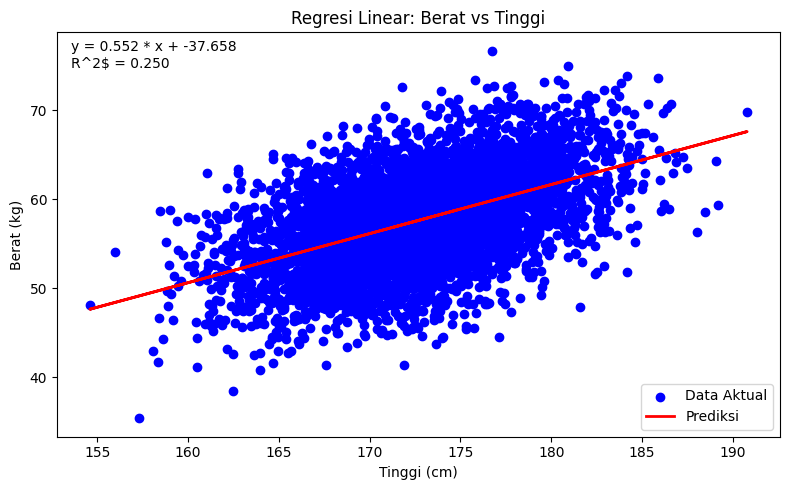

In [16]:
import matplotlib.pyplot as plt

# Plot data scatter
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color="blue", label="Data Aktual")

# Garis regresi
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Prediksi")

plt.xlabel("Tinggi (cm)")
plt.ylabel("Berat (kg)")
plt.title("Regresi Linear: Berat vs Tinggi")

plt.text(
    0.02, 0.98,
    f"y = {slope:.3f} * x + {intercept:.3f}\nR^2$ = {r2:.3f}",
    transform=plt.gca().transAxes, va="top"
)

plt.legend()
plt.tight_layout()
plt.show()

In [17]:
y_pred_test = model.predict(X_test)

# Buat tabel hasil (tinggi, aktual, prediksi, dan error)
hasil = pd.DataFrame({
    "Tinggi (cm)": X_test["tinggi_cm"].to_numpy(),
    "Berat aktual (kg)": y_test.to_numpy(),
    "Berat Prediksi (kg)": y_pred_test,
})

# 1) Selisih error (positif = overpredict)
hasil["Selisih error (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat aktual (kg)"]

# 2) Akurasi per-baris (100 * (1 - |error|/aktual)), dibatasi 0-100
denom = hasil["Berat aktual (kg)"].replace(0, np.nan) # antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil

,Tinggi (cm),Berat aktual (kg),Berat Prediksi (kg),Selisih error (kg),Akurasi (%)
0,174.73,50.162145,58.762969,8.600823,82.853956
1,171.31,50.328976,56.875724,6.546747,86.992092
2,169.29,58.219125,55.761035,-2.458090,95.777865
3,163.30,58.915435,52.455597,-6.459838,89.035407
4,170.52,63.059364,56.439781,-6.619583,89.502617
...,...,...,...,...,...
4995,178.75,56.593269,60.981309,4.388041,92.246356
4996,163.05,47.451885,52.317641,4.865755,89.745918
4997,166.51,52.459772,54.226959,1.767187,96.631349
4998,167.70,49.898653,54.883632,4.984978,90.009794


In [21]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/praktikum_ml/praktikum03/data/Copy of stunting_wasting_dataset.csv')
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [22]:
df.describe()

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
count,100000.000000,100000.000000,100000.000000
mean,11.992580,73.132657,9.259256
std,7.199671,11.360846,3.300780
min,0.000000,42.600000,1.000000
25%,6.000000,65.500000,6.900000
50%,12.000000,74.200000,9.200000
75%,18.000000,81.400000,11.700000
max,24.000000,97.600000,17.200000


In [23]:
df1 = (df[["Berat Badan (kg)", "Jenis Kelamin", "Umur (bulan)", "Tinggi Badan (cm)"]]
       .rename(columns={
           "Jenis Kelamin": "jk",
           "Umur (bulan)": "umur_bln",
           "Tinggi Badan (cm)": "tinggi_cm",
           "Berat Badan (kg)": "berat_kg"
       })
       .copy()
      )

# Laki-laki: 1, Perempuan: 0
df1["jk"] = df1["jk"].map({"Laki-laki": 1, "Perempuan": 0})

df1.head()

,berat_kg,jk,umur_bln,tinggi_cm
0,13.3,1,19,91.6
1,8.5,1,20,77.7
2,10.3,1,10,79.0
3,8.3,0,2,50.3
4,10.9,0,5,56.4


In [24]:
corr_matrix = df1.corr()
print(corr_matrix)

           berat_kg        jk  umur_bln  tinggi_cm
berat_kg   1.000000  0.045797  0.665389   0.626005
jk         0.045797  1.000000  0.004046   0.073505
umur_bln   0.665389  0.004046  1.000000   0.875869
tinggi_cm  0.626005  0.073505  0.875869   1.000000


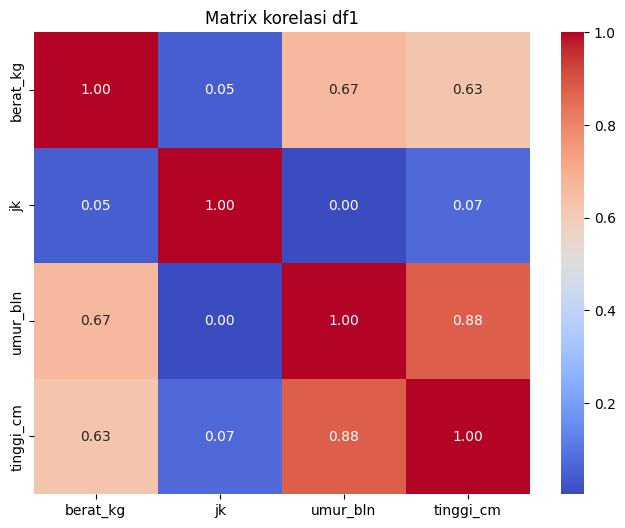

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrix korelasi df1")
plt.show()

In [28]:
from sklearn.model_selection import train_test_split

# Misalkan target (Y) adalah berat badan, # Variabel dependen
y = df1["berat_kg"]

# Fitur (X) adalah umur dan tinggi, # Variabel independen
X = df1[["umur_bln", "tinggi_cm"]]

# Bagi data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # random_state supaya hasil konsisten
)

# Cetak Pembagian Data
print("Jumlah data train :", len(X_train))
print("Jumlah data test  :", len(X_test))

# cek apakah sudah ada konstanta pada data training
X_train.head()


Jumlah data train : 80000
Jumlah data test  : 20000


,umur_bln,tinggi_cm
75220,2,51.9
48955,13,74.3
44966,17,86.7
13568,16,76.8
92727,20,78.5


In [35]:
import statsmodels.api as sm

X_train_cost = sm.add_constant(X_train)
X_train_cost.head()

,const,umur_bln,tinggi_cm
75220,1.0,2,51.9
48955,1.0,13,74.3
44966,1.0,17,86.7
13568,1.0,16,76.8
92727,1.0,20,78.5


In [37]:
import statsmodels.api as sm

# Buat model OLS
model = sm.OLS(y_train, X_train_cost).fit()

print('----------------------------')
print(model.params)
print('----------------------------')

# Ambil parameter regresi
const = model.params['const']
x1_umur = model.params['umur_bln']
x2_tinggi = model.params['tinggi_cm']

# Print persamaan regresi
print(f"y = ({const:.3f}) + ({x1_umur:.3f})*x1 + ({x2_tinggi:.3f})*x2")

----------------------------
const        2.545617
umur_bln     0.229719
tinggi_cm    0.054192
dtype: float64
----------------------------
y = (2.546) + (0.230)*x1 + (0.054)*x2


In [38]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               berat_kg   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                 3.272e+04
Date:                Mon, 13 Oct 2025   Prob (F-statistic):               0.00
Time:                        02:34:50   Log-Likelihood:            -1.8505e+05
No. Observations:               80000   AIC:                         3.701e+05
Df Residuals:                   79997   BIC:                         3.701e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5456      0.091     28.039      0.0

In [39]:
import numpy as np
import statsmodels.api as sm
import pandas as pd

# Tambahkan konstanta ke data uji
X_test_const = sm.add_constant(X_test)

# Prediksi berat badan
y_pred_test = model.predict(X_test_const)

# Buat tabel hasil prediksi
hasil = pd.DataFrame({
    "Umur (bulan)": X_test["umur_bln"].to_numpy(),
    "Tinggi (cm)": X_test["tinggi_cm"].to_numpy(),
    "Berat Aktual (kg)": y_test.to_numpy(),
    "Berat Prediksi (kg)": y_pred_test
})

# 1) Selisih error (positif = overpredict)
hasil["Selisih error (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat Aktual (kg)"]

# 2) Akurasi per baris (100 x (1 - |error/aktual|)), dibatasi 0–100
denom = hasil["Berat Aktual (kg)"].replace(0, np.nan)  # antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil


,Umur (bulan),Tinggi (cm),Berat Aktual (kg),Berat Prediksi (kg),Selisih error (kg),Akurasi (%)
75721,1,54.6,7.0,5.734226,-1.265774,81.917510
80184,8,66.0,12.2,7.960047,-4.239953,65.246290
19864,20,90.0,10.9,12.017284,1.117284,89.749692
76699,13,82.4,9.6,9.997392,0.397392,95.860500
92991,11,70.1,13.2,8.871391,-4.328609,67.207511
...,...,...,...,...,...,...
32595,9,67.3,11.8,8.260216,-3.539784,70.001830
29313,15,80.2,9.6,10.337607,0.737607,92.316595
37862,8,61.9,8.0,7.737860,-0.262140,96.723246
53421,12,74.9,5.4,9.361232,3.961232,26.643845


In [40]:
path = "/content/drive/MyDrive/praktikum_ml/praktikum03/"

In [44]:
import kagglehub

#Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/bike-share-dataset")

print("Path to dataset files:", path)

ValueError: Invalid dataset handle: /content/drive/MyDrive/praktikum_ml/praktikum03/data/day.csv

In [42]:
df.describe()

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
count,100000.000000,100000.000000,100000.000000
mean,11.992580,73.132657,9.259256
std,7.199671,11.360846,3.300780
min,0.000000,42.600000,1.000000
25%,6.000000,65.500000,6.900000
50%,12.000000,74.200000,9.200000
75%,18.000000,81.400000,11.700000
max,24.000000,97.600000,17.200000


In [45]:
df2= pd.read_csv('/content/drive/MyDrive/praktikum_ml/praktikum03/data/day.csv')
df2.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [47]:
# Tentukan target dan fitur
y = df2["cnt"]
x = df2[["temp", "hum", "windspeed", "atemp"]]

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
    )

print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))

Jumlah data train: 584
Jumlah data test: 147


In [52]:
import statsmodels.api as sm

# Tambahkan konstanta
X_train = sm.add_constant(X_train)

# Fit model
model = sm.OLS(y_train, X_train).fit()

# Lihat parameter
print(model.params)


const        3739.977893
temp         2602.358162
hum         -3036.122982
windspeed   -3882.798294
atemp        4547.359927
dtype: float64


In [54]:
const = model.params["const"]
b_temp = model.params["temp"]
b_hum = model.params["hum"]
b_wind = model.params["windspeed"]
b_atemp = model.params["atemp"]

print(f"y = {const:.3f} + {b_temp:.3f}*temp + {b_hum:.3f}*hum + {b_wind:.3f}*windspeed + {b_atemp:.3f}*atemp")


y = 3739.978 + 2602.358*temp + -3036.123*hum + -3882.798*windspeed + 4547.360*atemp


In [55]:
# Tambahkan konstanta ke data uji
X_test_const = sm.add_constant(X_test)

# Prediksi
y_pred = model.predict(X_test_const)

# Buat DataFrame hasil
hasil = pd.DataFrame({
    "cnt_aktual": y_test,
    "cnt_prediksi": y_pred
})

# Hitung error dan akurasi sederhana
hasil["selisih"] = hasil["cnt_prediksi"] - hasil["cnt_aktual"]
hasil["akurasi_%"] = (1 - abs(hasil["selisih"]) / hasil["cnt_aktual"]) * 100

# Tampilkan beberapa baris awal hasil
hasil.head()


,cnt_aktual,cnt_prediksi,selisih,akurasi_%
703,6606,4207.360125,-2398.639875,63.689981
33,1550,2627.633685,1077.633685,30.475246
300,3747,3380.995059,-366.004941,90.232054
456,6041,4023.645878,-2017.354122,66.605626
633,7538,4997.675785,-2540.324215,66.299758


In [56]:
# Ringkasan hasil regresi
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     118.6
Date:                Mon, 13 Oct 2025   Prob (F-statistic):           7.75e-74
Time:                        02:57:51   Log-Likelihood:                -5067.4
No. Observations:                 584   AIC:                         1.014e+04
Df Residuals:                     579   BIC:                         1.017e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3739.9779    399.474      9.362      0.0